In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta


data_lef = pd.read_csv('20180926_basic_movement_Chi-Lan_IMU_left.csv')
data_rig = pd.read_csv('20180926_basic_movement_Chi-Lan_IMU_right.csv')


In [4]:
def judge_LorR(data_lef, data_rig):
    data_lef.loc[:, 'LorR'] = 'L'
    data_rig.loc[:, 'LorR'] = 'R'
    data_all = pd.concat([data_lef, data_rig])

    count_L = 0
    count_R = 0

    for i in range(6,len(data_all.columns[:-2])):
        tmp_data_L = data_all[data_all.LorR=='L'].groupby('video_aboutTime').apply(
                        lambda x: abs(x.iloc[:, i]-x.iloc[:, i].mean())).mean()
        tmp_data_R = data_all[(data_all.LorR=='R')].groupby('video_aboutTime').apply(
                        lambda x: abs(x.iloc[:, i]-x.iloc[:, i].mean())).mean()

        if np.abs(tmp_data_L) > np.abs(tmp_data_R):
            count_L = count_L + 1
            #print data_all.columns[i],'L'
        else:
            count_R = count_R + 1
            #print data_all.columns[i],'R'

    if count_L > count_R:
        return 'L'
    else:
        return 'R'

In [5]:

def averageTime_eachActions(data):
    time_motions={i: timedelta(0) for i in range(1,7+1) }
    for label_i in range(1,7+1):
        tmp = timedelta(0)
        labeled_data = data[data.label==label_i]
        labeled_data.video_aboutTime = pd.to_datetime(labeled_data.video_aboutTime,format='%M:%S')
        labeled_data_G = labeled_data.groupby(labeled_data.index.to_series().diff().ne(1).cumsum()).groups
        for group in labeled_data_G.itervalues():
            time_motions[label_i]  = time_motions[label_i] +abs(labeled_data.loc[group[0],'video_aboutTime'] - labeled_data.loc[group[-1],'video_aboutTime'])
        time_motions[label_i] = time_motions[label_i] /float(len(labeled_data_G))
        #print 'label:',label_i, time_motions[label_i]    
        
    return time_motions  
        
user_time = averageTime_eachActions(data_lef)        

AttributeError: 'DataFrame' object has no attribute 'label'

In [6]:
def print_user_averageTime(time_motions):
    labels=['0. No nabel',
        '1. Spin by hand',
        '2. Remove with screws',
        '3. Screw with screws',
        '4. Rotate the object with both hands',
        '5. Pick up the object with one hand',
        '6. Put the screws up',
        '7. Put the screws sideways',
        '8. Weird!']

    for label_i in range(1,7+1):
        print ' %s: %.2f s' %(labels[label_i],time_motions[label_i].total_seconds())

print_user_averageTime(user_time)        

NameError: name 'user_time' is not defined

AttributeError: 'Figure' object has no attribute 'bar'

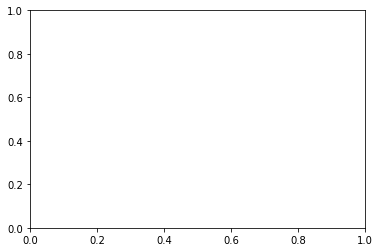

In [7]:

def bar_eachActions(user_time):
    n_groups = 7
    fig, ax = plt.subplots()
    mastr_time =[5.133333333,
                         3.0,
                         4.9,
                         3.555555555,
                         1.186046511,
                         3.736842105,
                         4.6000000000000005]

    index = np.arange(n_groups)
    bar_width = 0.35

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = fig.bar(index, user_time, bar_width,
                     alpha=opacity,
                     color='b',
                     #yerr=std_men,
                     error_kw=error_config,
                     label='User')

    rects2 = fig.bar(index + bar_width, mastr_time, bar_width,
                     alpha=opacity,
                     color='r',
                     #yerr=std_women,
                     error_kw=error_config,
                     label='Master')
    plt.xlabel('Actions')
    plt.ylabel('Seconds')
    plt.title('Avarage time each actions')
    plt.xticks(index + bar_width / 2, index+1)
    plt.legend()

    plt.tight_layout()
    plt.show()
    
bar_eachActions(np.arange(1.0,8.0))    